# Disks Temperature (T$_{mm}$) from resolved disks 

Leonardo Testi - Gothenburg 5 June 2016
(still working on this in Munich - 21 June 2016)

We use the fits made to the resolved Lupus disks (and the masses computed with the disk models) to attempt to derive an empirical relationship for T$_{mm}$ such that applying this T$_{mm}$ to unresolved disk photometry we derive an approximately correct value of the disk mass.


In [38]:
import numpy as np
#import scipy.stats as ss
import scipy.optimize as so
import matplotlib
import matplotlib.pyplot as plt
#import astropy.io.fits as aiof
import astropy.io.ascii as aio
#from spectral_cube import SpectralCube
#import pyregion
import astropy.units as u
#from astropy.analytic_functions import blackbody_nu
from astropy.coordinates import SkyCoord
#import aplpy
#import os

import my_tmm_classes as mytmm

%matplotlib inline 
matplotlib.rcParams['axes.linewidth'] = 4.5
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['font.size'] = 24

#tm = aio.read('table_fits_results_g.txt')
lupus_table_file = 'lupus_k337_table_fits_results_g.txt'
bds_table_file = 'bds_k200_table_fits_results_g.txt'
chai_table_file = '/Users/ltesti/Cha/ALMA-Ilaria/uvfits_cha/chai_Pascucci_k337_table_fits_results_g.txt'
bds_table_file = '/Users/ltesti/Desktop/Dropbox/ALMA_Data/ALMA_C01/bds_disks/new_fits/bds_RicciTesti_k337_table_fits_results_g.txt'

### Update table on disk with T$_{mm}$

In [39]:
reload(mytmm)
lup = mytmm.DiskSample(lupus_table_file)

#[plt.plot(lup.stars[i].lmstar,np.log10(lup.stars[i].mdust),'o',color='b') for i in range(len(lup.stars))]
#for i in range(len(lup.stars)):
#    print('{0} {1} F={2} M={3}+{4}-{5} Tmm={6}+{7}-{8}'.format(lup.stars[i].star_id, lup.stars[i].star_name, lup.stars[i].fcont, lup.stars[i].mdust, lup.stars[i].mdust-lup.stars[i].mdust_16, lup.stars[i].mdust_84-lup.stars[i].mdust, lup.stars[i].tmm_fs[0], lup.stars[i].tmm_fs_16[0]-lup.stars[i].tmm_fs[0], lup.stars[i].tmm_fs[0]-lup.stars[i].tmm_fs_84[0]))
    
lup.write_table('test_out.txt')
print('{0}'.format(lup))

Table of Disk observed and fitted properties, read from file lupus_k337_table_fits_results_g.txt containing 31 objects (20 validated)


### Figure of T$_{mm}$ against all parameters (stellar and disk)

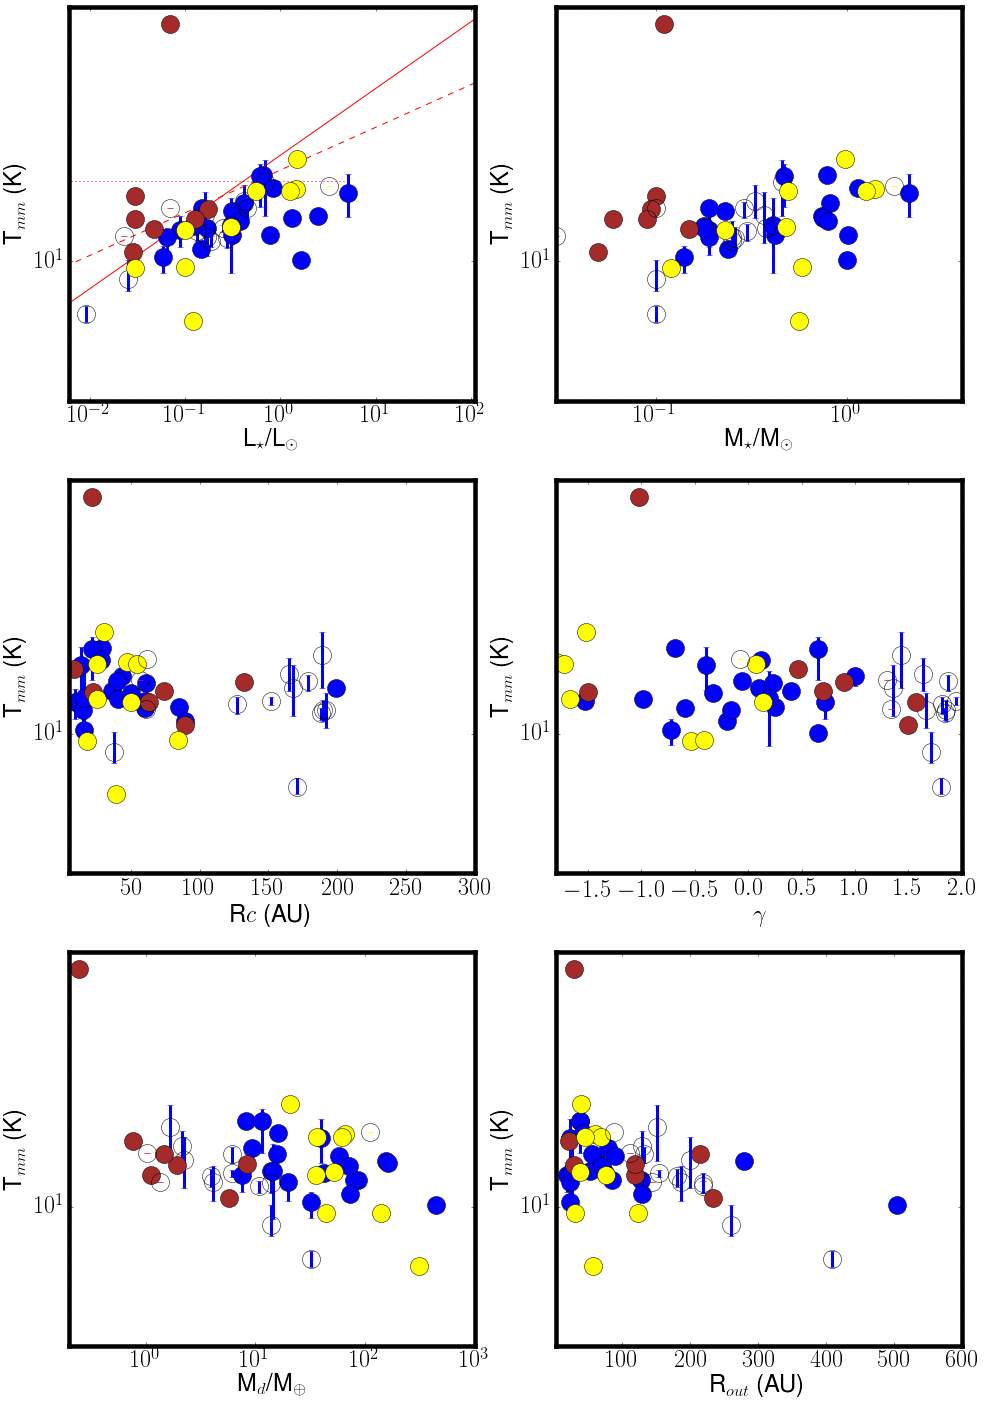

In [51]:
reload(mytmm)

trange = [3.,90.]
#grange = [-2.,2.]
#lrange = [0.05,110.]
msrange = [0.03,4.]
mdrange = [0.2,1000.]
rcrange = [5.,300.]
#routrange = [2.,600.]

lup = mytmm.DiskSample(lupus_table_file, tab_fmt='lupus')
bds = mytmm.DiskSample(bds_table_file, tab_fmt='bds')
chai = mytmm.DiskSample(chai_table_file, tab_fmt='bds')
fig, axf = lup.do_6_par_plot(newfig=True, plot_tmm_recipes=True, mytrange=trange, myrcrange=rcrange, mymsrange=msrange)
status = bds.do_6_par_plot(ax=axf, newfig=False, mycolor='brown', mytrange=trange, myrcrange=rcrange, mymsrange=msrange)
status = chai.do_6_par_plot(ax=axf, newfig=False, mycolor='yellow', mymdrange=mdrange, mytrange=trange, myrcrange=rcrange, mymsrange=msrange)
#lup2.do_6_par_plot(ax=axf, newfig=False, mycolor='red', mysymbol='x')

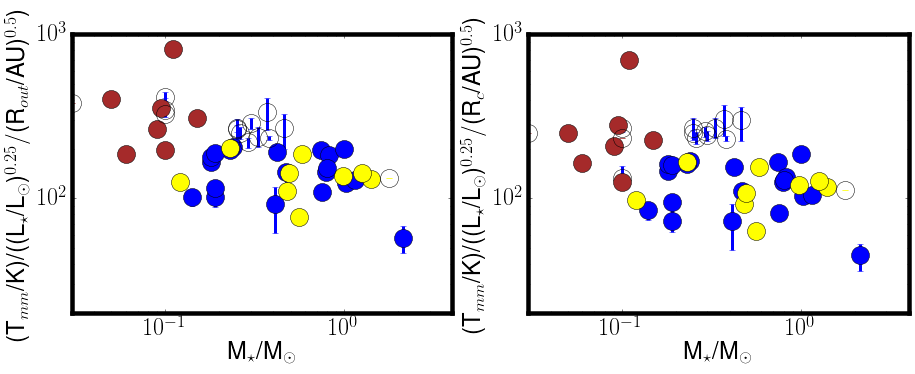

In [52]:

msrange = [0.03,4.]
yrange = [20.,1000.]

fig, axf = lup.do_LR_plot(newfig=True, myyrange=yrange, myxrange=msrange)
status = chai.do_LR_plot(ax=axf, newfig=False, mycolor='yellow', myyrange=yrange, myxrange=msrange)
status = bds.do_LR_plot(ax=axf, newfig=False, mycolor='brown', myyrange=yrange, myxrange=msrange)

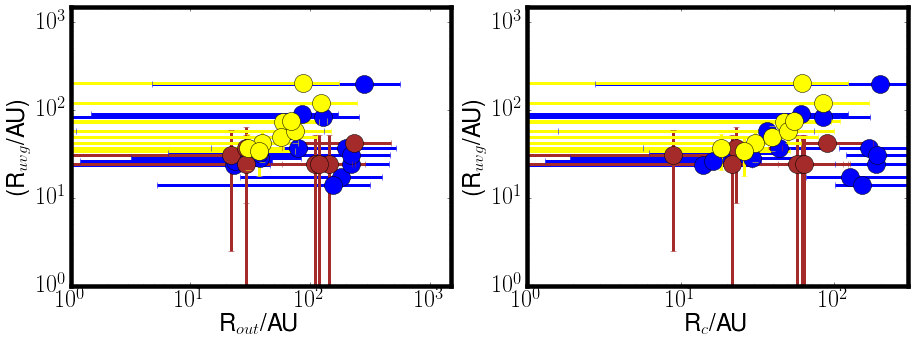

In [55]:
# Do we see a relationship between Ruvg and Rout (or Rc)?

ruvgrange = [1.,1500.]
rcrange = [1.,300.]
routrange = [1.,1500.]

fig, axf = lup.do_RR_plot(newfig=True, myyrange=ruvgrange, myxrange1=routrange, myxrange2=rcrange)
status = bds.do_RR_plot(ax=axf, newfig=False, mycolor='brown', myyrange=ruvgrange, myxrange1=routrange, myxrange2=rcrange)
status = chai.do_RR_plot(ax=axf, newfig=False, mycolor='yellow', myyrange=ruvgrange, myxrange1=routrange, myxrange2=rcrange)

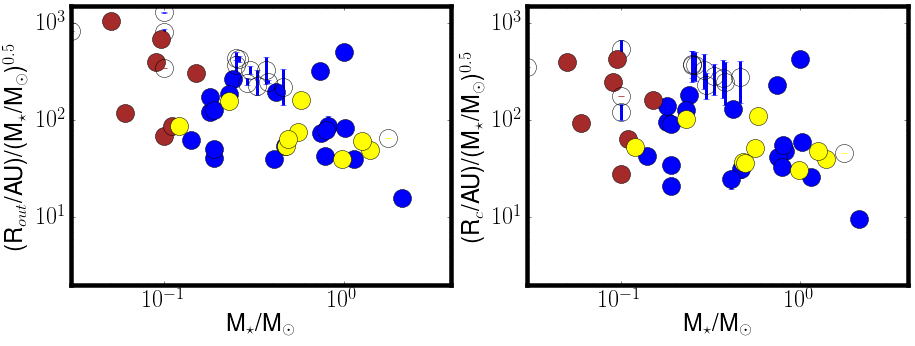

In [43]:
# Do we see a relationship between Mstar and Rout (or Rc)?

msrange = [0.03,4.]
rcrange = [5.,100.]
routrange = [2.,1500.]

fig, axf = lup.do_RM_plot(newfig=True, myyrange=routrange, myxrange=msrange)
status = bds.do_RM_plot(ax=axf, newfig=False, mycolor='brown', myyrange=routrange, myxrange=msrange)
status = chai.do_RM_plot(ax=axf, newfig=False, mycolor='yellow', myyrange=routrange, myxrange=msrange)

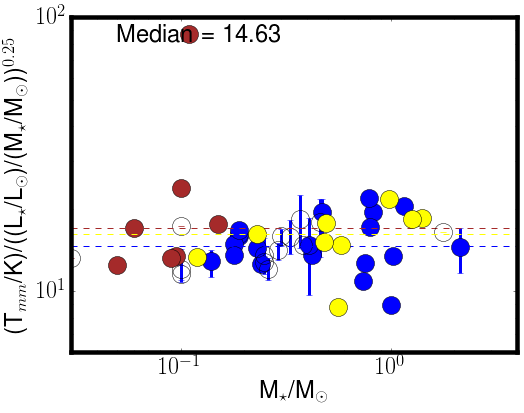

In [44]:
# Can we use Ls/Ms instead of Ls/Rc^2 ??

msrange = [0.03,4.]
rcrange = [5.,100.]
yrange = [6.,100.]

fig = lup.do_LM_plot(newfig=True, myyrange=yrange, myxrange=msrange)
status = bds.do_LM_plot(newfig=False, mycolor='brown', dolabel=False, myyrange=yrange, myxrange=msrange)
status = chai.do_LM_plot(newfig=False, mycolor='yellow', dolabel=False, myyrange=yrange, myxrange=msrange)

### Attempt to use the observed size
Here we try to use the major axis from the gaussian fit to the visibilities as a proxy for the disk size

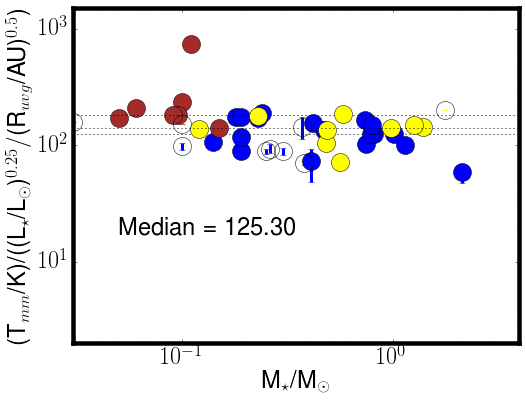

In [45]:
# Do we see a relationship between Tmm and R)?


msrange = [0.03,4.]
rcrange = [5.,100.]
routrange = [2.,1500.]

fig = lup.do_aM_plot(newfig=True, myyrange=routrange, myxrange=msrange)
status = bds.do_aM_plot(newfig=False, mycolor='brown', dolabel=False, myyrange=routrange, myxrange=msrange)
status = chai.do_aM_plot(newfig=False, mycolor='yellow', dolabel=False, myyrange=routrange, myxrange=msrange)

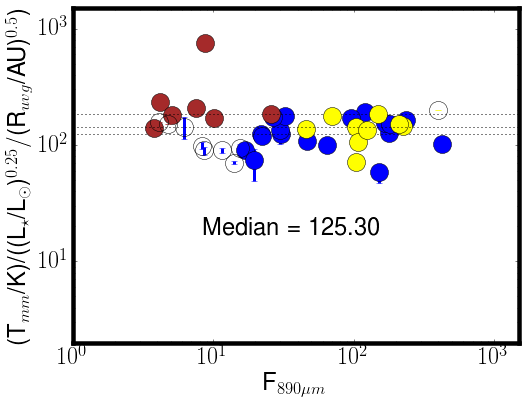

In [46]:
# Do we see a relationship between Tmm and R)?
# Plot in funzione di F_{890um}

msrange = [0.03,4.]
frange = [1,1500.]
rcrange = [5.,100.]
routrange = [2.,1500.]

fig = lup.do_aF_plot(newfig=True, myyrange=routrange, myxrange=frange)
status = bds.do_aF_plot(newfig=False, mycolor='brown', dolabel=False, myyrange=routrange, myxrange=frange)
status = chai.do_aF_plot(newfig=False, mycolor='yellow', dolabel=False, myyrange=routrange, myxrange=frange)

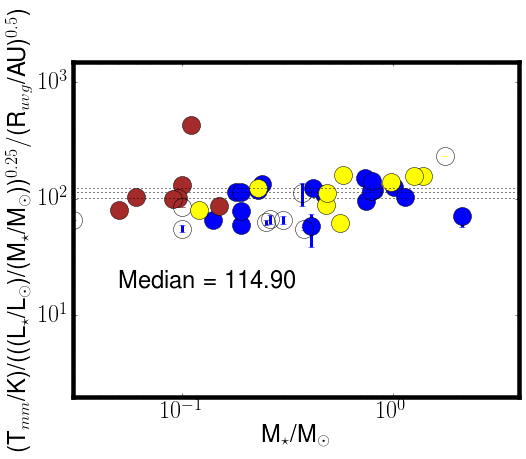

In [47]:
# Do we see a relationship between Tmm and R)?

msrange = [0.03,4.]
rcrange = [5.,100.]
routrange = [2.,1500.]

fig = lup.do_LaMM_plot(newfig=True, myyrange=routrange, myxrange=msrange)
status = bds.do_LaMM_plot(newfig=False, mycolor='brown', dolabel=False, myyrange=routrange, myxrange=msrange)
status = chai.do_LaMM_plot(newfig=False, mycolor='yellow', dolabel=False, myyrange=routrange, myxrange=msrange)

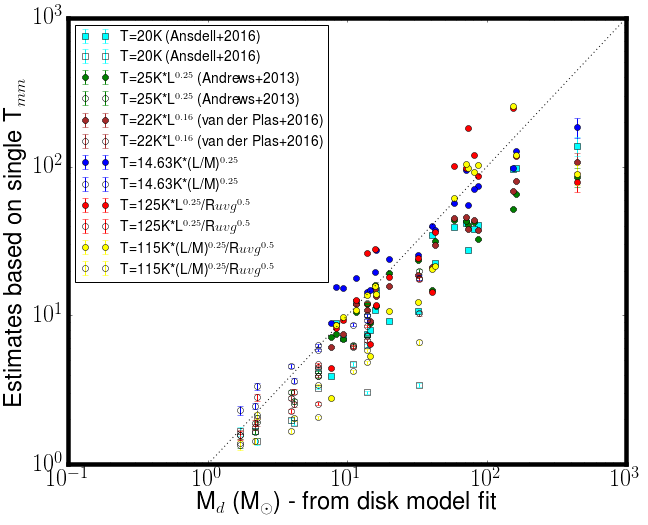

In [48]:
# Try to ee what happens...


msrange = [0.05,4.]
rcrange = [5.,100.]
yrange = [6.,100.]

#lup2 = mytmm.DiskSample(lupus_table_file)
lup.calc_tlt(14.63)
lup.calc_tlt_uvg(125.3,0.15)
lup.calc_tlt_lam(115.,0.15)
lup.calc_ta()
lup.calc_md_tlt(nu = 340.*u.GHz, k340 = 3.4)

fig = plt.figure(figsize=(10,8))

#plt.plot(lup2.mytable[lup2.nval]['M_dust_50'],lup2.mytable[lup2.nval]['M_dust'],'s',color='cyan', label='T=20K (Ansdell+2016)')
plt.errorbar(lup.mytable[lup.nval]['M_dust_50'],lup.m20k[lup.nval],
             yerr=[lup.m20k_em[lup.nval],lup.m20k_ep[lup.nval]],
             fmt='s',color='cyan', label='T=20K (Ansdell+2016)')
plt.errorbar(lup.mytable[lup.ninval]['M_dust_50'],lup.m20k[lup.ninval],
             yerr=[lup.m20k_em[lup.ninval],lup.m20k_ep[lup.ninval]],
             fmt='s',color='cyan', mfc='none', label='T=20K (Ansdell+2016)')

plt.errorbar(lup.mytable[lup.nval]['M_dust_50'],lup.mta[lup.nval],
             yerr=[lup.mta_em[lup.nval],lup.mta_ep[lup.nval]],
             fmt='8',color='g', label=r'T=25K*L$^{0.25}$ (Andrews+2013)')
plt.errorbar(lup.mytable[lup.ninval]['M_dust_50'],lup.mta[lup.ninval],
             yerr=[lup.mta_em[lup.ninval],lup.mta_ep[lup.ninval]],
             fmt='8',color='g', mfc='none', label=r'T=25K*L$^{0.25}$ (Andrews+2013)')

plt.errorbar(lup.mytable[lup.nval]['M_dust_50'],lup.mtvdp[lup.nval],
             yerr=[lup.mtvdp_em[lup.nval],lup.mtvdp_ep[lup.nval]],
             fmt='8',color='brown', label=r'T=22K*L$^{0.16}$ (van der Plas+2016)')
plt.errorbar(lup.mytable[lup.ninval]['M_dust_50'],lup.mtvdp[lup.ninval],
             yerr=[lup.mtvdp_em[lup.ninval],lup.mtvdp_ep[lup.ninval]],
             fmt='8',color='brown', mfc='none', label=r'T=22K*L$^{0.16}$ (van der Plas+2016)')

plt.errorbar(lup.mytable[lup.nval]['M_dust_50'],lup.mlt[lup.nval],
             yerr=[lup.mlt_em[lup.nval],lup.mlt_ep[lup.nval]],
             fmt='o',color='b', label=r'T=14.63K*(L/M)$^{0.25}$')
plt.errorbar(lup.mytable[lup.ninval]['M_dust_50'],lup.mlt[lup.ninval],
             yerr=[lup.mlt_em[lup.ninval],lup.mlt_ep[lup.ninval]],
             fmt='o',color='b', mfc='none', label=r'T=14.63K*(L/M)$^{0.25}$')

plt.errorbar(lup.mytable[lup.nval]['M_dust_50'],lup.mlt_uvg[lup.nval],
             yerr=[lup.mlt_uvg_em[lup.nval],lup.mlt_uvg_ep[lup.nval]],
             fmt='o',color='r', label=r'T=125K*L$^{0.25}$/R${uvg}^{0.5}$')
plt.errorbar(lup.mytable[lup.ninval]['M_dust_50'],lup.mlt_uvg[lup.ninval],
             yerr=[lup.mlt_uvg_em[lup.ninval],lup.mlt_uvg_ep[lup.ninval]],
             fmt='o',color='r', mfc='none', label=r'T=125K*L$^{0.25}$/R${uvg}^{0.5}$')

plt.errorbar(lup.mytable[lup.nval]['M_dust_50'],lup.mlt_lam[lup.nval],
             yerr=[lup.mlt_lam_em[lup.nval],lup.mlt_lam_ep[lup.nval]],
             fmt='o',color='yellow', label=r'T=115K*(L/M)$^{0.25}$/R${uvg}^{0.5}$')
plt.errorbar(lup.mytable[lup.ninval]['M_dust_50'],lup.mlt_lam[lup.ninval],
             yerr=[lup.mlt_lam_em[lup.ninval],lup.mlt_lam_ep[lup.ninval]],
             fmt='o',color='yellow', mfc='none', label=r'T=115K*(L/M)$^{0.25}$/R${uvg}^{0.5}$')

#plt.plot(lup2.mytable[lup2.nval]['M_dust_50'],lup2.m20k[lup2.nval],'+',color='k')
#plt.plot(lup2.mytable[lup2.nval]['M_dust_50'],lup2.mta[lup2.nval],'8',color='g', label=r'T=25K*L$^{0.25}$ (Andrews+2013)')
#plt.plot(lup2.mytable[lup2.nval]['M_dust_50'],lup2.mlt[lup2.nval],'o',color='b', label=r'T=15K*(L/M)$^{0.25}$')
#plt.plot(lup2.mytable[lup2.ninval]['M_dust_50'],lup2.mytable[lup2.ninval]['M_dust'],'s',color='cyan', mfc='none', label='T=20K (Ansdell+2016)')
#plt.plot(lup2.mytable[lup2.ninval]['M_dust_50'],lup2.mta[lup2.ninval],'8',color='g', mfc='none', label=r'T=25K*L$^{0.25}$ (Andrews+2013)')
#plt.plot(lup2.mytable[lup2.ninval]['M_dust_50'],lup2.mlt[lup2.ninval],'o',color='b', mfc='none', label=r'T=15K*(L/M)$^{0.25}$')
plt.plot([1.,1000.],[1.,1000.],linestyle='dotted',color='k')
plt.xlabel(r'M$_d$ (M$_\odot$) - from disk model fit')
plt.ylabel(r'Estimates based on single T$_{mm}$')
plt.legend(loc=2, fontsize=14)
plt.xlim(0.1,1000)
plt.xscale('log')
plt.yscale('log')

Found 1 values


/Users/ltesti/anaconda/lib/python2.7/site-packages/astropy/table/column.py:271: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return self.data.__ne__(other)


(array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.]),
 array([-0.341, -0.241, -0.141, -0.041,  0.059,  0.159,  0.259,  0.359,
         0.459,  0.559,  0.659]),
 <a list of 10 Patch objects>)

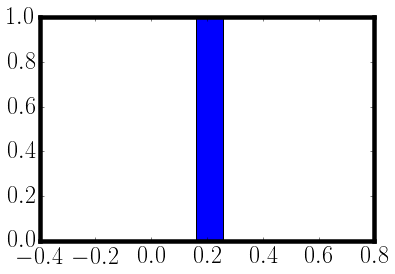

In [49]:
nn = np.where(lup.mytable['a'] != '...')
x = np.zeros(len(nn[0]))
print('Found {0} values'.format(len(nn[0])))
for i in range(len(x)):
    x[i] = float(lup.mytable['a'][nn[0][i]])
plt.hist(x,10)